In [43]:
import pywt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from modwt import modwt, modwtmra
from sklearn import preprocessing
import pmdarima

In [4]:
df = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_yahoo.csv')

In [6]:
data = df['Close']

In [7]:
train_n = data.shape[0]*4//5
train = np.array(data[:train_n])
test = np.array(data[train_n:])

In [8]:
wt = modwt(data, 'db2', 6)
c = modwtmra(wt, 'db2')

In [9]:
detail = c[:6]
smooth = c[6]

In [10]:
smooth_test = smooth[train_n:]
smooth_train = smooth[:train_n]
detail_train = []
detail_test = []
for i in range(len(detail)):
    detail_train.append(detail[i][:train_n])
    detail_test.append(detail[i][train_n:])

In [14]:
from pmdarima.arima import ndiffs

In [18]:
def num_diffs(y_train):
    kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
    adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
    n_diffs = max(adf_diffs, kpss_diffs)
    return(n_diffs)

In [35]:
smooth_auto = pmdarima.auto_arima(smooth_train, d=num_diffs(smooth_train), seasonal=False, stepwise=True, suppress_warnings=True, max_p=20, trace=2, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-52222.904, Time=0.59 sec
First viable model found (-52222.904)
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-63537.355, Time=0.33 sec
New best model found (-63537.355 < -52222.904)
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-52215.207, Time=1.24 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-63748.426, Time=1.53 sec
New best model found (-63748.426 < -63537.355)
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=-63797.390, Time=0.55 sec
New best model found (-63797.390 < -63748.426)
 ARIMA(4,3,0)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=-63868.046, Time=1.99 sec
New best model found (-63868.046 < -63797.390)
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=nan, Time=4.85 sec
 ARIMA(4,3,1)(0,0,0)[0]             : AIC=-64139.828, Time=1.86 sec
New best model found (-64139.828 < -63868.046)
 ARIMA(5,3,1)(0,0,0)[0]    

In [36]:
smooth_auto.order

(8, 3, 0)

In [53]:
detail_models = []

In [54]:
for detail_series in detail_train:
    detail_auto = pmdarima.auto_arima(detail_series, d=num_diffs(detail_series), seasonal=False, stepwise=True, suppress_warnings=True, max_p=6, trace=2, error_action='ignore')
    detail_models.append(detail_auto)

Performing stepwise search to minimize aic
Near non-invertible roots for order (2, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=2.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14125.431, Time=0.07 sec
First viable model found (14125.431)
Near non-invertible roots for order (1, 0, 0)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
Near non-invertible roots for order (0, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
Near non-invertible roots for order (1, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
 ARIMA(1,0,1)(0,0,0)[0]             : 

Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-46173.136, Time=6.65 sec
New best model found (-46173.136 < -44652.800)
Near non-invertible roots for order (1, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=nan, Time=2.82 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-42063.627, Time=5.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-47133.893, Time=3.38 sec
New best model found (-47133.893 < -46173.136)
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-47099.667, Time=4.61 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-39817.678, Time=4.89 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-47136.533, Time=1.06 sec

In [55]:
detail_models

[ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(3, 1, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False)]

In [59]:
def arima_train(train, test, arima, max_p):
    trainorder = arima.order
    tot = len(test)
    history = [x for x in train]
    predictions = []
    for t in range(tot):
        try:
            print(str(t+1) + "/" + str(tot))
            arima.fit(history)
            yhat = arima.predict()[0]
            predictions.append(yhat)
            history.append(test[t])
            
        except Exception:
            print("Relocating ARIMA Parameters...")
            arima = pmdarima.auto_arima(history, d = num_diffs(history), seasonal=False, stepwise=True, suppress_warnings=True, max_p=max_p, trace=2, error_action='ignore')
            arima.fit(history)
            yhat = arima.predict()[0]
            predictions.append(yhat)
            history.append(test[t])
            
    return(predictions)

In [60]:
smooth_pred = arima_train(smooth_train, smooth_test, smooth_auto, 15)

1/100
2/100
3/100
4/100
Relocating ARIMA Parameters...
Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-52258.824, Time=2.55 sec
First viable model found (-52258.824)
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-52256.710, Time=0.20 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-63572.752, Time=0.32 sec
New best model found (-63572.752 < -52258.824)
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-52272.556, Time=0.81 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=nan, Time=2.67 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-63826.669, Time=0.48 sec
New best model found (-63826.669 < -63572.752)
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-63915.669, Time=1.14 sec
New best model found (-63915.669 < -63826.669)
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=-63894.042, Time=0.40 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-63971.512, Time=1.38 sec
New best model found (-63971.512 < -63915.669)
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=nan, Time=2.20 sec
 ARIMA(1,3

 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-52369.657, Time=0.31 sec
New best model found (-52369.657 < -52363.940)
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=nan, Time=2.01 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=nan, Time=2.55 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-64000.751, Time=1.40 sec
New best model found (-64000.751 < -52369.657)
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-64032.081, Time=0.57 sec
New best model found (-64032.081 < -64000.751)
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-63919.662, Time=0.66 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=-64017.927, Time=0.75 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-64131.794, Time=2.17 sec
New best model found (-64131.794 < -64032.081)
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=nan, Time=2.76 sec
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=-64408.742, Time=0.67 sec
New best model found (-64408.742 < -64131.794)
 ARIMA(0,3,3)(0,0,0)[0]             : AIC=-52363.228, Time=4.10 sec
Near non-invertible roots for order (2

29/100
30/100
Relocating ARIMA Parameters...
Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-52599.387, Time=3.78 sec
First viable model found (-52599.387)
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-52608.862, Time=0.20 sec
New best model found (-52608.862 < -52599.387)
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-64008.935, Time=0.69 sec
New best model found (-64008.935 < -52608.862)
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-52608.756, Time=1.21 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-64201.775, Time=0.48 sec
New best model found (-64201.775 < -64008.935)
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=-64298.597, Time=1.86 sec
New best model found (-64298.597 < -64201.775)
 ARIMA(4,3,0)(0,0,0)[0]             : AIC=-64454.397, Time=2.98 sec
New best model found (-64454.397 < -64298.597)
 ARIMA(5,3,0)(0,0,0)[0]             : AIC=-64671.392, Time=1.80 sec
New best model found (-64671.392 < -64454.397)
 ARIMA(6,3,0)(0,0,0)[0]             : AIC=-64754

 ARIMA(7,3,1)(0,0,0)[0]             : AIC=-64639.885, Time=2.43 sec
 ARIMA(6,3,1)(0,0,0)[0]             : AIC=-64597.221, Time=3.15 sec
 ARIMA(8,3,1)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(7,3,0)(0,0,0)[0] intercept   : AIC=-64867.200, Time=11.18 sec

Best model:  ARIMA(7,3,0)(0,0,0)[0]          
Total fit time: 41.071 seconds
35/100
36/100
37/100
38/100
Relocating ARIMA Parameters...
Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-52715.035, Time=5.21 sec
First viable model found (-52715.035)
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-52719.339, Time=0.72 sec
New best model found (-52719.339 < -52715.035)
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-64146.974, Time=2.16 sec
New best model found (-64146.974 < -52719.339)
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-52723.487, Time=1.64 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=nan, Time=4.88 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-64439.115, Time=0.85 sec
New best model found (

 ARIMA(1,3,3)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,3,3)(0,0,0)[0]             : AIC=-52874.280, Time=2.65 sec
 ARIMA(2,3,3)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(1,3,2)(0,0,0)[0] intercept   : AIC=-64708.710, Time=3.86 sec

Best model:  ARIMA(1,3,2)(0,0,0)[0]          
Total fit time: 26.179 seconds
51/100
52/100
53/100
Relocating ARIMA Parameters...
Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-52901.952, Time=4.75 sec
First viable model found (-52901.952)
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-52911.309, Time=0.55 sec
New best model found (-52911.309 < -52901.952)
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=nan, Time=2.02 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-52907.815, Time=0.73 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=nan, Time=2.59 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept   : AIC=-52907.368, Time=1.51 sec

Best model:  ARIMA(0,3,0)(0,0,0)[0]          
Total fit time: 12.153 seconds
54/100
55/100


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py:4161: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)


Relocating ARIMA Parameters...
Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-53199.653, Time=2.18 sec
First viable model found (-53199.653)
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=nan, Time=0.86 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=nan, Time=2.12 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-53204.466, Time=1.17 sec
New best model found (-53204.466 < -53199.653)
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-65040.600, Time=1.02 sec
New best model found (-65040.600 < -53204.466)
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-65017.032, Time=0.54 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-65139.162, Time=1.85 sec
New best model found (-65139.162 < -65040.600)
Near non-invertible roots for order (0, 3, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=inf, Time=1.79 sec
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=-65427.187, Time=0.92 se

[98.7616474058952,
 98.72548568106544,
 98.69229599182073,
 98.66204891426719,
 98.63465994974774,
 98.61006080681352,
 98.58842630063818,
 98.5698509857706,
 98.55440215457942,
 98.54228858298133,
 98.53394080581603,
 98.5291788110528,
 98.52842898845981,
 98.53169160055036,
 98.53912893156156,
 98.55084742999757,
 98.56709085624004,
 98.58846677404689,
 98.61504717866794,
 98.6473888521026,
 98.68570371762597,
 98.7302444358751,
 98.78140875460508,
 98.8392296504176,
 98.90397967824673,
 98.97570533407014,
 99.0544751735876,
 99.14062988345997,
 99.23401187757203,
 99.33472097051218,
 99.44279453890772,
 99.55822546870705,
 99.68117842933131,
 99.81156532309939,
 99.94933650858302,
 100.09435622393276,
 100.24652713783317,
 100.40589916222498,
 100.57220343883972,
 100.74537425816517,
 100.92503709769368,
 101.1111159257137,
 101.30309550870965,
 101.50071125289075,
 101.70373877788512,
 101.91181647873763,
 102.12440902782468,
 102.34115763261333,
 102.56126042448386,
 102.783840775

In [62]:
detail_pred = []
for i in range(len(detail_models)):
    d = arima_train(detail_train[i], detail_test[i], detail_models[i], 5)
    detail_pred.append(d)

1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100
1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46

In [64]:
pred = np.array(pred)
for i in detail_pred:
    pred += np.array(i)

In [66]:
actual = test

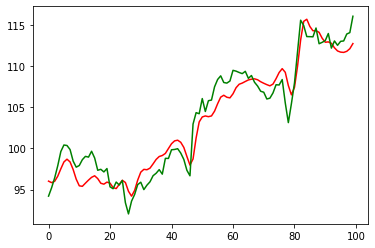

In [67]:
plt.plot(pred, color='r')
plt.plot(actual, color='g')

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [69]:
def mean_absolute_percentage_error(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return(mape)

In [70]:
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
mape = mean_absolute_percentage_error(actual, pred)
print("mse, rmse, mae, mape:" + str((mse,rmse,mae,mape)))

mse, rmse, mae, mape:(3.2067306238143543, 1.790734660359919, 1.5329636048697928, 1.4853611321605367)
